In [58]:
import pandas as pd

df = pd.read_csv('Sleep_PPG_data_2025-04-09T02_34_32.946.csv', delimiter=';')

In [59]:
df

,"09-04-2025, 02:34:34,0:00:00,green1:10936534",green2:10759979,ir1:14283197,ir2:14194139,accX:680,accY:-880,accZ:-1388
0,green1:10935826,green2:10760014,ir1:14281806,ir2:14195209,accX:680,accY:-880,accZ:-1388
1,green1:10935212,green2:10759921,ir1:14280897,ir2:14196271,accX:680,accY:-880,accZ:-1388
2,green1:10934656,green2:10759657,ir1:14280717,ir2:14197240,accX:680,accY:-880,accZ:-1388
3,green1:10934401,green2:10759586,ir1:14281442,ir2:14198338,accX:680,accY:-880,accZ:-1388
4,green1:10934563,green2:10759511,ir1:14282957,ir2:14199518,accX:680,accY:-880,accZ:-1388
...,...,...,...,...,...,...,...
1252839,green1:11604071,green2:11768809,ir1:15566893,ir2:15441638,accX:-1284,accY:1572,accZ:272
1252840,green1:11604455,green2:11768835,ir1:15566838,ir2:15441375,accX:-1284,accY:1572,accZ:272
1252841,green1:11604729,green2:11769381,ir1:15567115,ir2:15441652,accX:-1284,accY:1572,accZ:272
1252842,green1:11605189,green2:11769730,ir1:15567148,ir2:15441747,accX:-1284,accY:1572,accZ:272


In [65]:
temp = df['green2:10759979']

In [74]:
temp = temp.dropna()

In [78]:
temp[504000:514000]

554400    green2:11679588
554401    green2:11679701
554402    green2:11679537
554403    green2:11679469
554404    green2:11679333
               ...       
565394    green2:11688528
565395    green2:11688777
565396    green2:11689074
565397    green2:11689247
565399    green2:11689398
Name: green2:10759979, Length: 10000, dtype: object

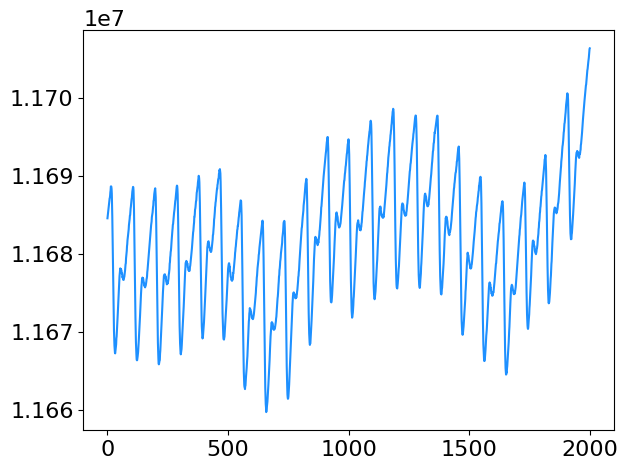

In [110]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot([int(i[7:]) for i in temp[510000:512000].values], color='dodgerblue' )#i

ax.yaxis.get_offset_text().set(size=16) 
#plt.xlabel("PPG Wave (100hz)", fontsize=20)
plt.tick_params(labelsize=16)

plt.tight_layout()

plt.savefig('ppgwave.png', dpi=300)  
plt.show()


In [103]:
help(labels[0].set_fontfamily)

Help on method set_fontfamily in module matplotlib.text:

set_fontfamily(fontname) method of matplotlib.text.Text instance
    Set the font family.  Can be either a single string, or a list of
    strings in decreasing priority.  Each string may be either a real font
    name or a generic font class name.  If the latter, the specific font
    names will be looked up in the corresponding rcParams.
    
    If a `Text` instance is constructed with ``fontfamily=None``, then the
    font is set to :rc:`font.family`, and the
    same is done when `set_fontfamily()` is called on an existing
    `Text` instance.
    
    Parameters
    ----------
    fontname : {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    
    See Also
    --------
    .font_manager.FontProperties.set_family



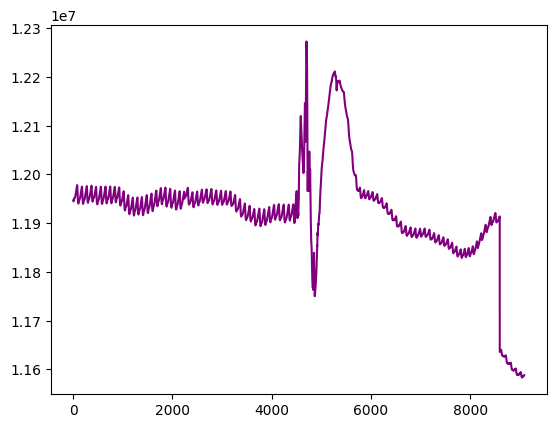

In [29]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot([int(i[7:]) for i in temp.values], color='purple' )#i
plt.show()


In [74]:
import pandas as pd

from datetime import datetime, timedelta

import tqdm

datestamp = '0:00:00'
timestamp = '0:00:00'
total_seconds = 0
# 定义一个函数来解析每一行的数据


# 读取文件
data = []
with open('sleepdata/night/wq_2025-04-15T00_56_06.806.csv', 'r') as file:
    for line in tqdm.tqdm(file):
        line = line.strip()
        if line:  # 确保不处理空行
            temp1, temp2, sensors = parse_line(line)
            if temp1 == 0:
                continue

            if temp2 != 1:
                datestamp = temp1
                timestamp = temp2
            
                time_obj = datetime.strptime(timestamp, '%H:%M:%S')
                total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
            
            data.append({'datestamp': datestamp, 'timestamp': total_seconds, **sensors})

# 将数据转换为 DataFrame
df = pd.DataFrame(data)

# 显示结果
print(df)

2484713it [00:12, 203264.05it/s]


        datestamp  timestamp    green1    green2       ir1       ir2  accX  \
0        00:56:08          0  11123598  11107816  14632402  14245245   996   
1        00:56:08          0  11119546  11102176  14627348  14246645   996   
2        00:56:08          0  11115340  11096784  14622381  14248612   996   
3        00:56:08          0  11111503  11091727  14618071  14250608   996   
4        00:56:08          0  11107773  11087042  14614742  14251886   996   
...           ...        ...       ...       ...       ...       ...   ...   
2258825  07:17:04      22855  11682319  11560119  15003485  15450516 -1716   
2258826  07:17:04      22855  11682232  11559478  15003226  15450070 -1716   
2258827  07:17:04      22855  11681655  11558436  15002824  15449485 -1716   
2258828  07:17:04      22855  11680468  11555850  15002308  15448943 -1716   
2258829  07:17:04      22855  11678865  11552789  15001610  15447931 -1716   

         accY  accZ  
0        1356   124  
1        1356   124

In [80]:
time_obj = datetime.strptime(labbeg, '%H:%M:%S')
beg_lab = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

for i in tqdm.tqdm( range(len(df)) ):
    time_obj = datetime.strptime(df.iloc[i, 0], '%H:%M:%S')
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    if(lab.iloc[i, 0])

SyntaxError: invalid syntax (537177332.py, line 2)

In [92]:
df['timestamp']

0              0
1              0
2              0
3              0
4              0
           ...  
2258825    22855
2258826    22855
2258827    22855
2258828    22855
2258829    22855
Name: timestamp, Length: 2258830, dtype: int64

In [3]:
import torch

def parse_line(line):
    
    datestamp = 0
    # 分割时间戳和传感器数据
    temp = line.split(',', 4)
    if len(temp) ==4:
        datestamp = temp[1]
        timestamp = temp[2]
        sensor_data = temp[3]
    else:
        sensor_data = temp[0]

    if len(sensor_data) == 1:
        return 0,0,0
    # 进一步分割传感器数据为字典
    sensors = {}
    for item in sensor_data.split(';'):
        key, value = item.split(':')
        sensors[key] = int(value)  # 将值转换为整数

    if datestamp == 0:
        return 1, 1, sensors
    return datestamp.strip(), timestamp.strip(), sensors

In [27]:
sleep_file

array(['yyx_Sleep_PPG_data_2025-04-24T00_15_17.605.csv'], dtype='<U46')

In [34]:
def parse_line(line):
    
    datestamp = 0
    # 分割时间戳和传感器数据
    temp = line.split(',', 4)
    if len(temp) ==4:
        datestamp = temp[1]
        timestamp = temp[2]
        sensor_data = temp[3]
    else:
        sensor_data = temp[0]

    if len(sensor_data) == 1:
        return 0,0,0
    # 进一步分割传感器数据为字典
    sensors = {}
    for item in sensor_data.split(';'):
        key, value = item.split(':')
        sensors[key] = int(value)  # 将值转换为整数

    if datestamp == 0:
        return 1, 1, sensors
    return datestamp.strip(), timestamp.strip(), sensors

import os
    
from scipy import signal
from scipy import integrate

from scipy.interpolate import interp1d

li = os.listdir('sleepdata/unlabeled')
sleep_file = np.array(li)#[i.split('_')[0] for i in li])
sleep_file.sort()

already = np.array(os.listdir('unlabel/ppg'))

dict = {'wake':0, 'light':1, 'deep':2, 'rem':3, 'miss':-1}

for i in range(len(sleep_file)):

    if (sleep_file[i].split('_')[0]+'.pt') in already:
        continue
    
    # 读取文件
    data = []
    
    datestamp = '0:00:00'
    timestamp = '0:00:00'
    total_seconds = 0

    with open('sleepdata/unlabeled/' + sleep_file[i], 'r') as file:
        for line in tqdm.tqdm(file):
            line = line.strip()
            if line:  # 确保不处理空行
                temp1, temp2, sensors = parse_line(line)
                if temp1 == 0:
                    continue
    
                if temp2 != 1:
                    datestamp = temp1
                    timestamp = temp2
                
                    time_obj = datetime.strptime(timestamp, '%H:%M:%S')
                    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
                
                data.append({'datestamp': datestamp, 'timestamp': total_seconds, **sensors})
    
    # 将数据转换为 DataFrame
    df = pd.DataFrame(data)
    
    lab_li = list()
    for j in range(df['timestamp'].iloc[0], df['timestamp'].iloc[-1], 30):
        lab_li.append('wake')
    
    da_ali = df
    
    for j in range(len(lab_li)):
        if not ((da_ali['timestamp']>= j * 30) & (da_ali['timestamp']<j * 30 + 30)).any():
            lab_li[j] = 'miss'
    
    
    for j in range(len(lab_li)):
        if not ((da_ali['timestamp']>= j * 30) & (da_ali['timestamp']<j * 30 + 30)).any():
            lab_li[j] = 'miss'
    
    da_ali['green2'] = ( da_ali['green2']-da_ali['green2'].mean() ) / da_ali['green2'].std()
    
    x = list()
    y = list()
    temp = da_ali['timestamp'].value_counts()
    
    frag = 0
    for j in tqdm.tqdm(range(len(da_ali))):
        if frag == 0:
            xlen = temp[da_ali['timestamp'].iloc[j]]
            xcnt = xlen
            frag = 1
            xbeg = da_ali['timestamp'].iloc[j]
            
        if xcnt>0:
            xcnt = xcnt-1
            x.append(xbeg)
            xbeg = xbeg + 1 / xlen
            y.append(da_ali['green2'].iloc[j])
        if xcnt==0:
            frag = 0

    
    #f_x = interp1d(x, y, fill_value="extrapolate") 
    f_x = interp1d(x, y, kind='linear', fill_value=(0, 0),  bounds_error=False)
    
    x_clean = f_x([j for j in np.arange(0, int(x[-1] + 1), 0.01)])
    
    
    torch.save(torch.tensor(x_clean), 'unlabel/ppg/' + sleep_file[i].split('_')[0] + '.pt')
    torch.save(torch.tensor([dict[j] for j in lab_li]), 'unlabel/lab/' + sleep_file[i].split('_')[0] + '.pt')

2624589it [00:12, 217641.33it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2385990/2385990 [00:17<00:00, 133501.60it/s]


In [31]:
sleep_file

array(['.ipynb_checkpoints', 'lzh_Sleep_data_2025-04-17T02_19_49.030.csv',
       'qhf_data_2025-04-16T00_16_37.962.csv',
       'wq1_2025-04-11T01_40_23.808.csv',
       'wq2_2025-04-12T01_50_26.995.csv',
       'ws_2025-04-15T01_41_24.219395.csv',
       'wyy_data_2025-04-19T02_20_02.293.csv',
       'wzl_data_2025-04-16T00_08_04.239.csv',
       'xnc_data_2025-04-22T03_18_52.204.csv',
       'ykw_data_2025-04-20T00_27_48.298.csv',
       'yyx_Sleep_PPG_data_2025-04-24T00_15_17.605.csv',
       'zhy_data_2025-04-18T01_08_13.469.csv'], dtype='<U46')

In [20]:
from scipy.interpolate import CubicSpline
import tqdm
from datetime import datetime, timedelta
import pandas as pd

from scipy.interpolate import interp1d
import numpy as np

# 读取文件
data = []

datestamp = '0:00:00'
timestamp = '0:00:00'
total_seconds = 0

with open('sleepdata/night/fyx_Sleep_data_2025-04-16T00_28_02.462105.csv', 'r') as file:
    for line in tqdm.tqdm(file):
        line = line.strip()
        if line:  # 确保不处理空行
            temp1, temp2, sensors = parse_line(line)
            if temp1 == 0:
                continue

            if temp2 != 1:
                datestamp = temp1
                timestamp = temp2
            
                time_obj = datetime.strptime(timestamp, '%H:%M:%S')
                total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
            
            data.append({'datestamp': datestamp, 'timestamp': total_seconds, **sensors})

# 将数据转换为 DataFrame
df = pd.DataFrame(data)



lab_li = list()
for i in range(df['timestamp'].iloc[0], df['timestamp'].iloc[-1], 30):
    lab_li.append('wake')

da_ali = df

for j in range(len(lab_li)):
    if not ((da_ali['timestamp']>= j * 30) & (da_ali['timestamp']<j * 30 + 30)).any():
        lab_li[j] = 'miss'

da_ali['green2'] = ( da_ali['green2']-da_ali['green2'].mean() ) / da_ali['green2'].std()

x = list()
y = list()
temp = da_ali['timestamp'].value_counts()

frag = 0
for j in tqdm.tqdm(range(len(da_ali))):
    if frag == 0:
        xlen = temp[da_ali['timestamp'].iloc[j]]
        xcnt = xlen
        frag = 1
        xbeg = da_ali['timestamp'].iloc[j]
        
    if xcnt>0:
        xcnt = xcnt-1
        x.append(xbeg)
        xbeg = xbeg + 1 / xlen
        y.append(da_ali['green2'].iloc[j])
    if xcnt==0:
        frag = 0


#f_x = interp1d(x, y, fill_value="extrapolate")
#f_x = CubicSpline(x, y, extrapolate=True)

f_x = interp1d(x, y, kind='linear', fill_value=(0, 0),  bounds_error=False)
x_clean = f_x([i for i in np.arange(0, int(x[-1] + 1), 0.01)])


2787279it [00:12, 223208.50it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2533890/2533890 [00:18<00:00, 134246.57it/s]


In [9]:
labbeg = lab.iloc[0, 0]
lab_li = list()
for j in range(len(lab)):
    time_obj = datetime.strptime(lab.iloc[j,0], '%H:%M:%S')
    beg = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

    time_obj = datetime.strptime(lab.iloc[j,1], '%H:%M:%S')
    end = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    for k in range(beg, end, 30):
        lab_li.append(lab.iloc[j,2])


In [16]:
lab_li = list()
for i in range(df['timestamp'].iloc[0], df['timestamp'].iloc[-1], 30):
    lab_li.append('wake')

In [17]:
len(lab_li)

941

In [15]:
df['timestamp'].iloc[0]

0

In [7]:
df

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
0,00:28:03,0,10077719,9634973,13126548,11265530,-1628,-648,1332
1,00:28:03,0,10076286,9632695,13125584,11264693,-1628,-648,1332
2,00:28:03,0,10074742,9630178,13124180,11263564,-1628,-648,1332
3,00:28:03,0,10072831,9627064,13123249,11262493,-1628,-648,1332
4,00:28:03,0,10071125,9623958,13122022,11261379,-1628,-648,1332
...,...,...,...,...,...,...,...,...,...
2533885,08:18:27,28223,10087990,10037016,14055110,11800031,728,1872,224
2533886,08:18:27,28223,10088886,10037238,14055528,11800257,728,1872,224
2533887,08:18:27,28223,10089441,10037356,14055935,11800436,728,1872,224
2533888,08:18:27,28223,10090140,10037740,14056378,11800587,728,1872,224


In [ ]:
f_x = interp1d(x, y, kind='linear', fill_value=(0, 0),  bounds_error=False)

In [441]:
df['green2']

0           9634973
1           9632695
2           9630178
3           9627064
4           9623958
             ...   
2533885    10037016
2533886    10037238
2533887    10037356
2533888    10037740
2533889    10038014
Name: green2, Length: 2533890, dtype: int64

In [327]:

#f_x = interp1d(x, y, fill_value="extrapolate")
#f_x = CubicSpline(x, y, extrapolate=True)
nk.ppg_clean(std_x[i:i+2000], sampling_rate=100)
f_x = interp1d(x, y, kind='linear', fill_value=(0, 0),  bounds_error=False)
x_clean = f_x([i for i in np.arange(0, int(x[-1] + 1), 0.01)])

In [368]:
x_clean.std()

0.9789463136842992

In [369]:
mean = x_clean.mean()
std = x_clean.std()

# 标准化变量
std_x = (x_clean - mean) / std
std_x = signal.filtfilt(b, a, std_x)



In [ ]:
std_x = signal.filtfilt(b, a, x_clean)

ppg_peaks_l = nk.ppg_findpeaks(-1 * std_x, sampling_rate=hz)
ppg_peaks_h = nk.ppg_findpeaks(std_x, sampling_rate=hz)

In [362]:
x_clean

array([0.        , 0.        , 0.        , ..., 1.40718114, 1.40830996,
       0.        ])

In [363]:
std_x

array([-1.67982320e-322, -1.72922976e-322, -9.38724727e-323, ...,
        1.01883214e+000,  5.44601260e-001, -1.03158932e-004])

In [350]:
x_clean[15000:20000][peak]

array([0.22752837, 0.24920848, 0.28916222, 0.78026702, 0.66818949,
       0.64327824, 0.62764018, 0.7690301 , 0.79566073, 0.78294155,
       0.77874524, 0.68922393, 0.40835995, 0.17051108, 0.24029264,
       0.38246293, 0.31319346, 0.18786741, 0.27433402, 0.33051417,
       0.37212216, 0.35485489, 0.29518589, 0.28526147, 0.27759467,
       0.23012052, 0.18404236, 0.17741866, 0.18690447, 0.20401923,
       0.23714777, 0.28106404, 0.28858222])

In [349]:
peak

array([ 302,  628,  686,  862,  920,  985, 1049, 1109, 1166, 1227, 1298,
       1362, 1423, 1479, 1565, 1620, 1693, 3872, 3957, 4037, 4106, 4162,
       4230, 4311, 4368, 4437, 4519, 4602, 4667, 4749, 4840, 4917, 4988])

In [ ]:
i = 0

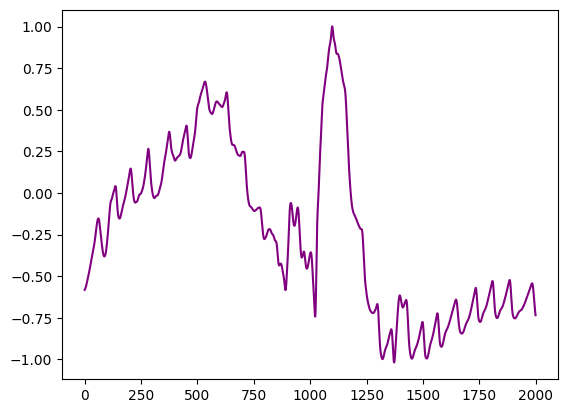

In [413]:
import matplotlib.pyplot as plt


ax = plt.axes()
ax.plot(std_x[i:i+2000], color='purple' )#i
plt.show()
i = i + 2000

In [414]:
i

32000

In [397]:
i

22000

In [392]:
i = i + 2000

In [398]:
i = 32000

In [428]:
smoothed_signal = nk.signal_smooth(std_x[i:i+2000])

In [429]:
peak = nk.ppg_findpeaks(smoothed_signal, sampling_rate=100)['PPG_Peaks']

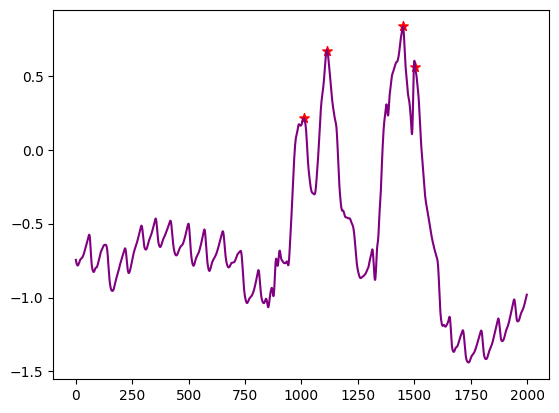

In [430]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot(std_x[i:i+2000], color='purple' )#i

ax.scatter(peak, std_x[i:i+2000][peak], s=50, marker='*', color='red')
plt.show()

In [455]:
nk.ppg_clean(std_x[i:i+2000])

array([ 0.02714649,  0.02769242,  0.02825442, ..., -0.0019765 ,
       -0.00170021, -0.00145046])

In [274]:
all_subjects = np.unique([i.split('.')[0] for i in os.listdir('ppg')])

In [275]:
all_subjects
from scipy.interpolate import CubicSpline
cs = CubicSpline(ppg_peaks_h['PPG_Peaks'], std_x[ppg_peaks_h['PPG_Peaks']], extrapolate=True)

array(['fyx', 'lzh', 'qhf', 'wq', 'ws', 'wzl', 'xnc', 'ykw', 'zhy'],
      dtype='<U3')

In [39]:
all_subjects

array(['gjf', 'lzh', 'qhf', 'wq1', 'wq2', 'ws', 'wyy', 'wzl', 'xnc',
       'ykw', 'yyx', 'zhy'], dtype='<U3')

In [40]:
import torch

from scipy import signal
from scipy import integrate

import io
import numpy as np
import pandas as pd
import neurokit2 as nk

import tqdm
import hrvanalysis as hrvana
from concurrent import futures
import os

import sys



import glob
from scipy.interpolate import interp1d


all_subjects = np.unique([i.split('.')[0] for i in os.listdir('unlabel/ppg')])

hz = 100

nyquist_freq = hz/2  # 奈奎斯特频率
order = 8
cutoff_freq = 10  # Hz, 选择合适的截止频率
b, a = signal.butter(order, cutoff_freq / nyquist_freq, btype='lowpass', analog=False)
b_l, a_l = signal.butter(4, 0.5 / nyquist_freq, btype='lowpass', analog=False)

def process_extract_features(file_id):#三个文件列表
#for file_id in tqdm.tqdm(all_subjects):
    
    y_true = list()
    
    x = torch.load("unlabel/ppg/"+str(file_id)+".pt")
    
    mean = torch.mean(x)
    std = torch.std(x)
    
    # 标准化变量
    std_x = (x - mean) / std
    std_x = signal.filtfilt(b, a, std_x)
    
    ppg_row = signal.resample(std_x, int(std_x.shape[0]/(hz/64)))#64hz
    
    std_x = nk.ppg_clean(std_x, sampling_rate=hz)
    
    ppg_peaks_l = nk.ppg_findpeaks(-1 * std_x, sampling_rate=hz)
    ppg_peaks_h = nk.ppg_findpeaks(std_x, sampling_rate=hz)
    
    hr_x = list()
    hr = list()
    bl_x = list()
    blood = list()
    
    for i in range(len(ppg_peaks_l['PPG_Peaks']) - 1):
        #heart rate
        hr.append(ppg_peaks_l['PPG_Peaks'][i+1] - ppg_peaks_l['PPG_Peaks'][i])
        hr_x.append(ppg_peaks_l['PPG_Peaks'][i])
    
    for i in range(len(ppg_peaks_h['PPG_Peaks']) - 1):
        blood.append(np.sum(-1*std_x[ppg_peaks_h['PPG_Peaks'][i]:ppg_peaks_h['PPG_Peaks'][i+1]]))
        bl_x.append(ppg_peaks_h['PPG_Peaks'][i])
    
    f_hr = interp1d(hr_x, hr, fill_value=(0, 0),  bounds_error=False)
    f_bl = interp1d(bl_x, blood, fill_value=(0, 0),  bounds_error=False)
    f_h = interp1d(ppg_peaks_h['PPG_Peaks'], std_x[ppg_peaks_h['PPG_Peaks']], fill_value=(0, 0),  bounds_error=False)
    f_l = interp1d(ppg_peaks_l['PPG_Peaks'], std_x[ppg_peaks_l['PPG_Peaks']], fill_value=(0, 0),  bounds_error=False)
    
    RR_list = f_hr([i for i in range(0, std_x.shape[0], int(hz / 2))])/hz
    blood_list = f_bl([i for i in range(0, std_x.shape[0], int(hz / 2))])/hz
    ba_list = signal.resample(signal.filtfilt(b_l, a_l, std_x), int(std_x.shape[0] / hz * 2))
    am_list = f_h([i for i in range(0, std_x.shape[0], int(hz / 2))]) - f_l([i for i in range(0, std_x.shape[0], int(hz / 2))])
    
    ppg_sig = np.concatenate(([RR_list], [am_list], [ba_list], [blood_list]), axis = 0)

    ppg_rrfea=list()
    ppg_amfea=list()
    ppg_bafea=list()
    ppg_blood=list()
    
    for i in tqdm.tqdm(range(0, int(std_x.shape[0]/hz * 2 - 40), 20)):
        if (len(ppg_blood)>=3664):
            break
        temp = hrvana.get_time_domain_features(RR_list[i:i+60] * 1000)
        ppg_rr = [temp['mean_nni'], temp['sdnn'], temp['sdsd']]
        temp = hrvana.get_frequency_domain_features(RR_list[i:i+60] * 1000)
        ppg_rr = ppg_rr + [temp['vlf'], temp['lf'], temp['hf'],
                        temp['lf_hf_ratio'], temp['total_power']]
        ppg_rrfea.append(ppg_rr)
        
        temp = hrvana.get_time_domain_features(am_list[i:i + 60] * 1000)
        ppg_rr = [temp['mean_nni'], temp['sdnn'], temp['sdsd']]
        temp = hrvana.get_frequency_domain_features(am_list[i:i + 60] * 1000)
        ppg_rr = ppg_rr + [temp['vlf'], temp['lf'], temp['hf'],
                        temp['lf_hf_ratio'], temp['total_power']]
        ppg_amfea.append(ppg_rr)

        temp = hrvana.get_time_domain_features(ba_list[i:i + 60] * 1000)
        ppg_rr = [temp['mean_nni'], temp['sdnn'], temp['sdsd']]
        temp = hrvana.get_frequency_domain_features(ba_list[i:i + 60] * 1000)
        ppg_rr = ppg_rr + [temp['vlf'], temp['lf'], temp['hf'],
                        temp['lf_hf_ratio'], temp['total_power']]
        ppg_bafea.append(ppg_rr)
        
        temp = hrvana.get_time_domain_features(blood_list[i:i + 60] * 1000)
        ppg_rr = [temp['mean_nni'], temp['sdnn'], temp['sdsd']]
        temp = hrvana.get_frequency_domain_features(blood_list[i:i + 60] * 1000)
        ppg_rr = ppg_rr + [temp['vlf'], temp['lf'], temp['hf'],
                        temp['lf_hf_ratio'], temp['total_power']]
        ppg_blood.append(ppg_rr)

    ppg_fea = np.concatenate((ppg_rrfea, ppg_amfea, ppg_bafea, ppg_blood), axis = 1)
    
    ppg_fea = np.transpose(ppg_fea, (1, 0))

    #torch.save(torch.tensor(ppg_row), '/extern2/zgz/wq/sleep/sleep_stage_ppg/clean_mesa_300s/da300s/'+mode+'/ppg/x_'+file_id+'.pt')
    torch.save(torch.tensor(ppg_sig), 'unlabel/sig/'+file_id+'.pt')
    torch.save(torch.tensor(ppg_fea), 'unlabel/fea/'+file_id+'.pt')
    
already = np.unique([i.split('.')[0] for i in os.listdir('unlabel/sig')])

#with futures.ProcessPoolExecutor(max_workers=10) as pool:
for PID in all_subjects:
    temp = PID #"%04d" % PID
    if temp not in already:
        print(PID)
        #pool.submit(process_extract_features, PID)
        process_extract_features(PID)
        #sys.exit()


/tmp/ipykernel_831210/2431372817.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if temp not in already:


gjf


  0%|                                                                                                                                                                                                                                                          | 0/2555 [00:00<?, ?it/s]/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/hrvanalysis/extract_features.py:123: RuntimeWarning: divide by zero encountered in divide
  heart_rate_list = np.divide(60000, nn_intervals)
/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcoun

lzh


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [00:06<00:00, 336.18it/s]


qhf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2315/2315 [00:06<00:00, 336.83it/s]


wq1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2423/2423 [00:07<00:00, 334.13it/s]


wq2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2455/2455 [00:08<00:00, 277.69it/s]


ws


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2417/2417 [00:07<00:00, 328.22it/s]


wyy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2464/2464 [00:42<00:00, 57.65it/s]


wzl


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2107/2107 [00:08<00:00, 245.37it/s]


xnc


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1932/1932 [00:13<00:00, 141.80it/s]


ykw


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3489/3489 [10:02<00:00,  5.79it/s]


yyx


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2479/2479 [00:07<00:00, 336.57it/s]


zhy


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2482/2491 [00:07<00:00, 328.58it/s]/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/hrvanalysis/extract_features.py:116: RuntimeWarning: invalid value encountered in scalar divide
  cvsd = rmssd / mean_nni
/extern2/zgz/.conda/envs/wq/lib/python3.8/site-packages/hrvanalysis/extract_features.py:120: RuntimeWarning: invalid value encountered in scalar divide
  cvnni = sdnn / mean_nni
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2491/2491 [00:07<00:00, 328.01it/s]


In [479]:
torch.load('fea/zhy.pt').isnan().any(axis = 1)

tensor([False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
         True, False])

In [481]:
os.listdir('ppg')

['qhf.pt',
 'wq.pt',
 'wzl.pt',
 'zhy.pt',
 'fyx.pt',
 'xnc.pt',
 'ykw.pt',
 'lzh.pt',
 'ws.pt']

In [482]:
li_fi = os.listdir('ppg')

In [490]:
temp = np.array(li_fi)
temp.sort()

In [491]:
temp

array(['fyx.pt', 'lzh.pt', 'qhf.pt', 'wq.pt', 'ws.pt', 'wzl.pt', 'xnc.pt',
       'ykw.pt', 'zhy.pt'], dtype='<U6')

In [41]:
li_fi = os.listdir('unlabel/ppg')

ppg = list()
sig = list()
fea = list()

temp = np.array(li_fi)
temp.sort()

for i in temp:
    ppg.append(torch.load('unlabel/ppg/' + i))
    sig.append(torch.load('unlabel/sig/' + i))
    fea.append(torch.load('unlabel/fea/' + i))

In [53]:
torch.concat(fea,axis=1).isnan().any(axis=1)

tensor([False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True, False, False, False,  True,  True,  True,
         True,  True])

In [524]:
lab = temp

array(['fyx.pt', 'lzh.pt', 'qhf.pt', 'wq.pt', 'ws.pt', 'wzl.pt', 'xnc.pt',
       'ykw.pt', 'zhy.pt'], dtype='<U6')

In [572]:
ppg[0].shape

torch.Size([2834700])

In [498]:
fea[0].shape

torch.Size([32, 2833])

In [512]:
sig[0]

tensor([[ 0.0000e+00,  1.2092e+02,  1.2043e+02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  6.5262e-03,  6.5059e-03,  ...,  7.8418e-03,
          8.8217e-03,  0.0000e+00],
        [ 1.3571e-03, -2.5817e-03, -2.6340e-03,  ..., -1.3965e-03,
          1.5672e-04,  8.5004e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], dtype=torch.float64)

In [516]:
ppg_temp.mean

tensor([186.3174, 186.3021, 186.2869,  ...,   1.4072,   1.4083,   1.4094],
       dtype=torch.float64)

In [42]:
from scipy.signal import resample
import pickle

def adjust_length_1D(tensor, target_length = 1200 * 1024):
    current_length = tensor.size(0)

    if current_length < target_length:
        # 如果长度不足，补零
        padding = target_length - current_length
        adjusted_tensor = torch.nn.functional.pad(tensor, (0, padding))
    else:
        # 如果长度超过，截断
        adjusted_tensor = tensor[:target_length]

    return adjusted_tensor
def adjust_length_2D(tensor, target_length = 1200 * 1024):
    
    current_length = tensor.size(1)

    if current_length < target_length:
        # 如果长度不足，补零
        padding = target_length - current_length
        adjusted_tensor = torch.nn.functional.pad(tensor, (0, padding, 0, 0))
    else:
        # 如果长度超过，截断
        adjusted_tensor = tensor[:, :target_length]

    return adjusted_tensor

#label = list()
for i in tqdm.tqdm(range(len(ppg))):
    
    ppg_temp = ppg[i]
    ppg_temp = (ppg_temp - ppg_temp.mean())/ppg_temp.std()
    ppg_temp = torch.tensor( resample(ppg_temp, int(ppg_temp.shape[0]/100/30*1024)) )
    ppg[i] = adjust_length_1D(ppg_temp, 1200 * 1024)
    
    sig_temp = sig[i]
    sig_temp = (sig_temp - sig_temp.mean(axis=1).unsqueeze(1))/sig_temp.std(axis=1).unsqueeze(1)
    sig_temp = adjust_length_2D(sig_temp, 1200 * 60)
    sig[i] = sig_temp
    
    fea_temp = fea[i]
    fea_temp = (fea_temp - fea_temp.mean(axis=1).unsqueeze(1))/fea_temp.std(axis=1).unsqueeze(1)
    fea_temp = adjust_length_2D(fea_temp, 1199 * 3 + 1)
    fea[i] = fea_temp
    

    #label.append( torch.tensor(test_label[test_label[:, 7] == i][:, 6].astype(float)) )
for i in range(len(fea)):
    fea[i] = torch.where(
        torch.isnan(fea[i]), 
        torch.full_like(fea[i], 0), 
        fea[i])

with open('unlabel/10h_input/all_ppg.pkl', 'wb') as f:
    pickle.dump(ppg, f)
with open('unlabel/10h_input/all_fea_conseq.pkl', 'wb') as f:
    pickle.dump(fea, f)
with open('unlabel/10h_input/all_sig_conseq.pkl', 'wb') as f:
    pickle.dump(sig, f)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.47it/s]


In [56]:
with open('unlabel/10h_input/all_fea_conseq.pkl', 'wb') as f:
    pickle.dump(fea, f)

In [522]:
len(sig[:8])

8

In [577]:
with open('10h_input/train_ppg.pkl', 'wb') as f:
    pickle.dump(ppg[:8], f)
with open('10h_input/train_fea.pkl', 'wb') as f:
    pickle.dump(fea[:8], f)
with open('10h_input/train_sig.pkl', 'wb') as f:
    pickle.dump(sig[:8], f)

with open('10h_input/test_ppg.pkl', 'wb') as f:
    pickle.dump(ppg[8:], f)
with open('10h_input/test_fea.pkl', 'wb') as f:
    pickle.dump(fea[8:], f)
with open('10h_input/test_sig.pkl', 'wb') as f:
    pickle.dump(sig[8:], f)

In [556]:
torch.stack(([i.isinf().any(axis=1) for i in fea])).any(axis=0)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False])

In [548]:
fea[0].isnan().any(axis=1)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,  True,
         True,  True,  True,  True, False, False, False,  True,  True,  True,
         True,  True])

In [576]:
for i in range(len(fea)):
    fea[i] = torch.where(
        torch.isnan(fea[i]), 
        torch.full_like(fea[i], 0), 
        fea[i])

In [43]:
temp

array(['gjf.pt', 'lzh.pt', 'qhf.pt', 'wq1.pt', 'wq2.pt', 'ws.pt',
       'wyy.pt', 'wzl.pt', 'xnc.pt', 'ykw.pt', 'yyx.pt', 'zhy.pt'],
      dtype='<U6')

In [44]:
lab_all = list()
for i in temp:
    lab_all.append(torch.load('unlabel/lab/'+i))
len(lab_all)

12

In [45]:
with open('unlabel/10h_input/lab.pkl', 'wb') as f:
    pickle.dump(lab_all, f)

In [469]:

std_x = signal.filtfilt(b, a, x_clean)
std_x = nk.ppg_clean(std_x, sampling_rate=100)
ppg_peaks_l = nk.ppg_findpeaks(-1 * std_x, sampling_rate=hz)
ppg_peaks_h = nk.ppg_findpeaks(std_x, sampling_rate=hz)

In [467]:
std_x.shape

(2834700,)

In [470]:
ppg_peaks_l

{'PPG_Peaks': array([  12201,   12306,   12454, ..., 2834362, 2834471, 2834635])}

In [471]:
len(ppg_peaks_l['PPG_Peaks'])

26668

In [472]:
len(ppg_peaks_h['PPG_Peaks'])

26363

In [347]:
len(nk.ppg_findpeaks(x_clean[15000:20000], sampling_rate=100)['PPG_Peaks'])

33

In [342]:
len(ppg_peaks_l['PPG_Peaks'])

17032

In [344]:
len(ppg_peaks_h['PPG_Peaks'])

5712

In [340]:
len(x_clean)

2834700

In [ ]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(ppg_peaks_h['PPG_Peaks'], std_x[ppg_peaks_h['PPG_Peaks']], extrapolate=True)

In [54]:
len(fea)

12

In [297]:
ppg_peaks_l['PPG_Peaks']

array([  12318,   12377,   12453, ..., 2833474, 2834061, 2834185])

In [310]:

ppg_peaks_h = nk.ppg_findpeaks(np.array(x), sampling_rate=hz)

In [311]:
ppg_peaks_h

{'PPG_Peaks': array([1168855, 2297868, 2565964])}

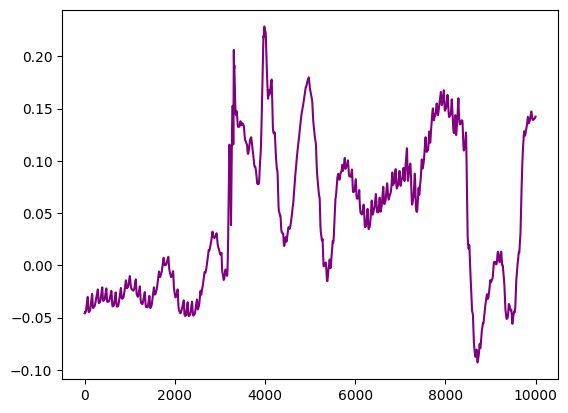

In [314]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot(std_x[-10000:], color='purple' )#i
plt.show()

In [ ]:
for i in range(len(ppg_peaks_h['PPG_Peaks']) - 1):
    blood.append(np.sum(-1*std_x[ppg_peaks_h['PPG_Peaks'][i]:ppg_peaks_h['PPG_Peaks'][i+1]]))
    bl_x.append(ppg_peaks_h['PPG_Peaks'][i])

In [287]:
blood

[21271.161086276545]

In [286]:
blood_list

array([nan, nan, nan, ..., nan, nan, nan])

In [281]:
ppg_sig

array([[-34.90254237, -34.75847458, -34.61440678, ...,  -2.61701874,
         -3.01139693,  -3.40577513],
       [ -1.08084817,  -1.0738124 ,  -1.06677663, ...,   0.40253447,
          0.40443369,   0.4063329 ],
       [ 13.36214496,  28.30856235,  24.6142287 , ...,  -0.71854873,
          1.40033594,  -2.17850202],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [277]:
blood_list

NameError: name 'blood_list' is not defined

In [241]:
import os
li = os.listdir('sleepdata/night')
sleep_file = (np.array(li)[['Sleep' in i for i in li]])
sleep_file.sort()

lab_file = (np.array(li)[['lab' in i for i in li]])
lab_file.sort()

In [246]:
sleep[1]

'lzh_Sleep_PPG_data_2025-04-22T01_29_07.226.csv'

In [244]:
[s.split('_')[0] for s in sleep]

['fyx', 'lzh', 'qhf', 'wq', 'ws', 'wzl', 'xnc', 'ykw', 'zhy']

In [247]:
lab_file[1]

'lzh_label-04-22.txt'

In [214]:
x_clean.shape

(2262400,)

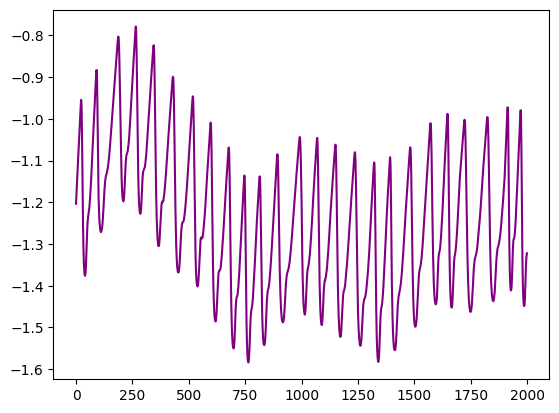

In [215]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot(x_clean[1000:3000], color='purple' )#i
plt.show()

In [ ]:
da_ali['timestamp'] = da_ali['timestamp'] - (beg_lab - beg_da)

In [209]:
da_ali

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
23240,01:00:00,0,11350071,-1.358200,14838452,14399556,1472,752,-600
23241,01:00:00,0,11350497,-1.350274,14838758,14399877,1472,752,-600
23242,01:00:00,0,11351427,-1.341511,14839291,14400176,1472,752,-600
23243,01:00:00,0,11352254,-1.333146,14839569,14400496,1472,752,-600
23244,01:00:00,0,11353157,-1.323991,14840047,14400715,1472,752,-600
...,...,...,...,...,...,...,...,...,...
2258825,07:17:04,22623,11682319,-0.386732,15003485,15450516,-1716,304,1608
2258826,07:17:04,22623,11682232,-0.390924,15003226,15450070,-1716,304,1608
2258827,07:17:04,22623,11681655,-0.397738,15002824,15449485,-1716,304,1608
2258828,07:17:04,22623,11680468,-0.414650,15002308,15448943,-1716,304,1608


In [203]:
x_clean

array([11411570.        , 11412782.        , 11414122.        , ...,
       11558435.99995955, 11555849.99995212, 11552788.999951  ])

In [200]:
dict = {'wake':0, 'light':1, 'deep':2, 'rem':3, 'miss':-1}
len([dict[i] for i in lab_li])

755

In [195]:
len(lab_li)

755

In [115]:
for i in range(len(lab_li)-1, -1, -1):
    if lab_li[i]=='miss':
        del lab_li[i]
    else: break

In [177]:
from scipy import signal
from scipy import integrate

from scipy.interpolate import interp1d

In [127]:
da_ali

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
23240,01:00:00,0,11350071,-1.358200,14838452,14399556,1472,752,-600
23241,01:00:00,0,11350497,-1.350274,14838758,14399877,1472,752,-600
23242,01:00:00,0,11351427,-1.341511,14839291,14400176,1472,752,-600
23243,01:00:00,0,11352254,-1.333146,14839569,14400496,1472,752,-600
23244,01:00:00,0,11353157,-1.323991,14840047,14400715,1472,752,-600
...,...,...,...,...,...,...,...,...,...
2258825,07:17:04,22623,11682319,-0.386732,15003485,15450516,-1716,304,1608
2258826,07:17:04,22623,11682232,-0.390924,15003226,15450070,-1716,304,1608
2258827,07:17:04,22623,11681655,-0.397738,15002824,15449485,-1716,304,1608
2258828,07:17:04,22623,11680468,-0.414650,15002308,15448943,-1716,304,1608


In [124]:
da_ali['green2'] = ( da_ali['green2']-da_ali['green2'].mean() ) / da_ali['green2'].std()

/tmp/ipykernel_4034971/1473634548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_ali['green2'] = ( da_ali['green2']-da_ali['green2'].mean() ) / da_ali['green2'].std()


In [126]:
da_ali['green2']

23240     -1.358200
23241     -1.350274
23242     -1.341511
23243     -1.333146
23244     -1.323991
             ...   
2258825   -0.386732
2258826   -0.390924
2258827   -0.397738
2258828   -0.414650
2258829   -0.434668
Name: green2, Length: 2235590, dtype: float64

In [ ]:
for i in range(len(lab_li)):
    if not ((da_ali['timestamp']>= i * 30) & (da_ali['timestamp']<i * 30 + 30)).any():
        lab_li[i] = 'miss'

In [98]:
da_ali['timestamp'] = da_ali['timestamp'] - 232

/tmp/ipykernel_4034971/891969024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_ali['timestamp'] = da_ali['timestamp'] -232


In [110]:
if ((da_ali['timestamp']>=30) & (da_ali['timestamp']<60)).any():
    

True

In [100]:
df[df['timestamp']>= beg_sec - beg_da ]

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
23240,01:00:00,232,11350071,11411570,14838452,14399556,1472,752,-600
23241,01:00:00,232,11350497,11412782,14838758,14399877,1472,752,-600
23242,01:00:00,232,11351427,11414122,14839291,14400176,1472,752,-600
23243,01:00:00,232,11352254,11415401,14839569,14400496,1472,752,-600
23244,01:00:00,232,11353157,11416801,14840047,14400715,1472,752,-600
...,...,...,...,...,...,...,...,...,...
2258825,07:17:04,22855,11682319,11560119,15003485,15450516,-1716,304,1608
2258826,07:17:04,22855,11682232,11559478,15003226,15450070,-1716,304,1608
2258827,07:17:04,22855,11681655,11558436,15002824,15449485,-1716,304,1608
2258828,07:17:04,22855,11680468,11555850,15002308,15448943,-1716,304,1608


In [81]:
labbeg = lab.iloc[0, 0]

In [76]:
lab = pd.read_csv('sleepdata/night/wq_label-04-15.txt', header=None)

In [66]:
lab.iloc[1, 0]

'1:27:00'

In [70]:
labbeg = lab.iloc[0, 0]
lab_li = list()
for i in tqdm.tqdm( range(len(lab)) ):
    time_obj = datetime.strptime(lab.iloc[i,0], '%H:%M:%S')
    beg = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

    time_obj = datetime.strptime(lab.iloc[i,1], '%H:%M:%S')
    end = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    for j in range(beg, end, 30):
        lab_li.append(lab.iloc[i,2])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 759.28it/s]


In [72]:
len(lab_li)

840

In [39]:
df['timestamp'].unique()

array(['0:00:00', '0:00:01', '0:00:02', ..., '7:03:57', '7:04:00',
       '7:04:03'], dtype=object)

In [157]:
da_ali

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
23240,01:00:00,0,11350071,-1.358200,14838452,14399556,1472,752,-600
23241,01:00:00,0,11350497,-1.350274,14838758,14399877,1472,752,-600
23242,01:00:00,0,11351427,-1.341511,14839291,14400176,1472,752,-600
23243,01:00:00,0,11352254,-1.333146,14839569,14400496,1472,752,-600
23244,01:00:00,0,11353157,-1.323991,14840047,14400715,1472,752,-600
...,...,...,...,...,...,...,...,...,...
2258825,07:17:04,22623,11682319,-0.386732,15003485,15450516,-1716,304,1608
2258826,07:17:04,22623,11682232,-0.390924,15003226,15450070,-1716,304,1608
2258827,07:17:04,22623,11681655,-0.397738,15002824,15449485,-1716,304,1608
2258828,07:17:04,22623,11680468,-0.414650,15002308,15448943,-1716,304,1608


In [161]:
x = list()
y = list()

temp = da_ali['timestamp'].value_counts()

frag = 0
for i in tqdm.tqdm(range(len(da_ali))):
    if frag == 0:
        xlen = temp[da_ali['timestamp'].iloc[i]]
        xcnt = xlen
        frag = 1
        xbeg = da_ali['timestamp'].iloc[i]
        
    if xcnt>0:
        xcnt = xcnt-1
        x.append(xbeg)
        xbeg = xbeg + 1 / xlen
        y.append(da_ali['green2'].iloc[i])
    if xcnt==0:
        frag = 0
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2235590/2235590 [00:32<00:00, 68793.19it/s]


In [178]:
f_x = interp1d(x, y, fill_value="extrapolate")

In [192]:
f_x([i for i in np.arange(0, int(x[-1] + 1), 0.01)]).shape

(2262400,)

In [187]:
int(x[-1] + 1)

22624

In [189]:
[i for i in np.arange(0, int(x[-1] + 1), 0.01)][-1]

22623.99

In [166]:
x[1005]

10.041666666666664

In [172]:
len(x),len(y)

(2235590, 2235590)

22624

In [158]:
da_ali

,datestamp,timestamp,green1,green2,ir1,ir2,accX,accY,accZ
23240,01:00:00,0,11350071,-1.358200,14838452,14399556,1472,752,-600
23241,01:00:00,0,11350497,-1.350274,14838758,14399877,1472,752,-600
23242,01:00:00,0,11351427,-1.341511,14839291,14400176,1472,752,-600
23243,01:00:00,0,11352254,-1.333146,14839569,14400496,1472,752,-600
23244,01:00:00,0,11353157,-1.323991,14840047,14400715,1472,752,-600
...,...,...,...,...,...,...,...,...,...
2258825,07:17:04,22623,11682319,-0.386732,15003485,15450516,-1716,304,1608
2258826,07:17:04,22623,11682232,-0.390924,15003226,15450070,-1716,304,1608
2258827,07:17:04,22623,11681655,-0.397738,15002824,15449485,-1716,304,1608
2258828,07:17:04,22623,11680468,-0.414650,15002308,15448943,-1716,304,1608


In [149]:

seclen = temp[da_ali['timestamp'].iloc[0]]

In [152]:
da_ali['timestamp'].iloc[0] + 1 / seclen

0.00909090909090909

In [145]:
da_ali['timestamp'].iloc[2588]

25

In [21]:
df.isna().any()

datestamp    False
timestamp    False
green1       False
green2       False
ir1          False
ir2          False
accX         False
accY         False
accZ         False
dtype: bool

In [11]:
line.split(',', 4)

['09-04-2025',
 ' 02:34:34',
 '0:00:00',
 'green1:10936534;green2:10759979;ir1:14283197;ir2:14194139;accX:680;accY:-880;accZ:-1388']